### Importing core libraries required for the case study

In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sea
import datetime as dt
import warnings

### Suppress warnings

In [249]:
warnings.filterwarnings('ignore')

### Setting max rows settings to 500 to display all the summary data

In [250]:
pd.set_option('display.max_columns', 500)

### Loading the loan data and converting into dataframe

In [251]:
loan_df=pd.read_csv('loan.csv')

# 1. Data Cleaning and Manipulation

## 1.1 To check if there is any headers/footers or summary details rows are there and delete it

In [252]:
print(loan_df.shape)

(39717, 111)


In [253]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

#### Dont see header or summary rows from above result. Checking for footer rows

In [254]:
loan_df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,NaN,Jul-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,0.0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

#### Dont see footers, Total, Subtotal rows

In [255]:
loan_df.shape

(39717, 111)

### Numbe of rows is 39717, and columns is 111

## 1.2 To check if there is unnessasry rows or not using loan_status column

loan_df['loan_status'].value_counts()

In [256]:
#Dropping the rows for loan_status=='Current'
loan_df= loan_df[loan_df['loan_status']!='Current']
print("Total number of rows now:",len(loan_df))

Total number of rows now: 38577


In [257]:
# Check if there is any duplicate rows.
duplicate_rows = len(loan_df[loan_df.duplicated()])
print("Count of duplicate rows:",round(duplicate_rows,2))

Count of duplicate rows: 0


### 1.3 Delete the Uneccessasry Columns

In [258]:
loan_df.shape

(38577, 111)

In [259]:
# Deleting the columns which is having all rows values as na.
loan_df = loan_df.dropna(axis=1, how="all")
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,NaN,NaN,9,0,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendin

In [260]:
# Deleting the rows which is having all columns values as na.
loan_df = loan_df.dropna(axis=0, how="all")

In [261]:
# Dropping column sub_grade as the current analysis will limit to Grade only
loan_df = loan_df.drop(['sub_grade'],  axis=1)

In [262]:
# Delete all the columns which value is uniqe in nature.

unique_columns = [col for col in loan_df.columns if loan_df[col].nunique() == len(loan_df)]
unique_columns

['id', 'member_id', 'url']

In [263]:
# Dropping text/description columns which wont contribute to overall analysis

In [264]:
loan_df.drop(['url','member_id'],axis=1, inplace=True)

In [265]:
loan_df.drop(columns=['desc','title'],inplace=True)
loan_df.shape

(38577, 51)

In [266]:
# Dropping all columns which refer to behavoural data of customer post loan approval 
# Behaviour data of the customers are captured post the loan approval
# The data is not available at the time of loan approval and thus cannot be used for calculations
behavioural_cols=['delinq_2yrs', 'earliest_cr_line', 'last_pymnt_amnt','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
                          'out_prncp', 'out_prncp_inv', 'total_pymnt','total_pymnt_inv', 'total_rec_prncp',
                          'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                        'application_type','last_pymnt_d','last_credit_pull_d']

loan_df=loan_df.drop(behavioural_cols,axis=1)

In [267]:
loan_df.shape

(38577, 30)

In [268]:
# Finding the columns with unique values
loan_df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
loan_status                       2
term                              2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
addr_state                       50
issue_d                          55
mths_since_last_delinq           95
mths_since_last_record          111
int_rate                        370
zip_code                        822
loan_amnt                       870
funded_amnt                    1019
dti                            2853
annual_inc                     5215
funded_amnt_inv                8050
installment                 

In [269]:
# Example most of the columns values is 1.Deletting them as well.
for column in loan_df.columns:
    if loan_df[column].nunique(dropna=True) == 1:
        print(column)
        loan_df = loan_df.drop(column, axis=1)
loan_df.shape

pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens


(38577, 22)

In [270]:
#Dropping the columns which is having more than 50% of value is null.
total_rows = len(loan_df)
for column in loan_df.columns:
    if loan_df[column].isna().mean().round(2) >= 0.50:
        print(column)
        loan_df = loan_df.drop(column, axis=1)
loan_df.shape

mths_since_last_delinq
mths_since_last_record


(38577, 20)

# 2. Data Conversion #############

In [271]:
loan_df.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [272]:
# Convert int_rate fromns tring to float.
loan_df['int_rate'].value_counts()

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
18.36%      1
16.01%      1
17.46%      1
16.71%      1
21.48%      1
Name: int_rate, Length: 370, dtype: int64

In [273]:
loan_df['int_rate']=loan_df['int_rate'].str.strip('%').astype(float)


In [274]:
loan_df['int_rate'].value_counts()

10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
17.46      1
16.71      1
21.48      1
20.52      1
22.64      1
Name: int_rate, Length: 370, dtype: int64

In [275]:
# Convert the column loan_funded_amnt and funded_amnt as flot64
loan_df = loan_df.astype({'loan_amnt':'float','funded_amnt':'float'})

In [276]:
# Rounding off the belows to two decimals points.
for c in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    loan_df[c] = loan_df[c].apply(lambda x: round(x,2))

In [277]:
loan_df['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [278]:
# Convert term from string to int.
def clean_term(term):
    return int(term.strip().split()[0])

loan_df['term'] = loan_df['term'].apply(clean_term) ## removing the string parts of int value
loan_df['term'].dtype

dtype('int64')

In [279]:
loan_df['term'].value_counts()

36    29096
60     9481
Name: term, dtype: int64

In [280]:
# Converting the column issue_d from string object to DateTime
loan_df['issue_d'] = pd.to_datetime(loan_df.issue_d, format='%b-%y')
loan_df['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

In [281]:
###### Imputing vs Dropping Columns ####

In [282]:
# Identify columns who have blank values and what percentage of total values are there blanks. 
# These values may need to be imputed
print('emp_length blank rows', loan_df['emp_length'].isna().sum())
print('pub_rec_bankruptcies blank rows', loan_df['pub_rec_bankruptcies'].isna().sum(), "\n")
imp_total = 0
for c in loan_df.columns[loan_df.isna().any()].tolist():
    imp_val = len(loan_df[loan_df[c].isna()]) / len(loan_df) * 100
    imp_total += imp_val
    print(c, round(imp_val, 2),"%")
print("\nTotal rows percentage whose columns are blank: ", round(imp_total ,2), "%")

emp_length blank rows 1033
pub_rec_bankruptcies blank rows 697 

emp_title 6.19 %
emp_length 2.68 %
pub_rec_bankruptcies 1.81 %

Total rows percentage whose columns are blank:  10.67 %


In [283]:
loan_df= loan_df[loan_df['emp_length'].notna()]
loan_df= loan_df[loan_df['pub_rec_bankruptcies'].notna()]

In [284]:
# Converting emp_length to integer values
def strip_emp_length(x):
  x=x.strip("years")
  x=x.strip("<")
  x=x.replace(" ", "")
  x=x.replace("+", "")
  return x

loan_df['emp_length']=loan_df['emp_length'].apply(lambda x : strip_emp_length(x) )

In [285]:
print(loan_df['emp_length'])

0        10
1         1
2        10
3        10
5         3
         ..
39562     1
39573     3
39623     8
39666     2
39680     2
Name: emp_length, Length: 36847, dtype: object


### 2.1 Derived Columns

#### 2.1.1 issue_year and Issue_month

In [286]:
# Adding additional column for Year and Month for analysis extrating Year and Month from issue_d
loan_df['issue_year']=pd.DatetimeIndex(loan_df['issue_d']).year
loan_df['issue_month']=pd.DatetimeIndex(loan_df['issue_d']).month
print(loan_df.shape)

(36847, 22)


 #### 2.1.2 Default column

In [287]:
loan_df['loan_status'].value_counts()

Fully Paid     31566
Charged Off     5281
Name: loan_status, dtype: int64

In [288]:
loan_df['default'] = loan_df['loan_status'].apply(lambda a : 0 if a.strip() == 'Fully Paid' else 1)
loan_df.default.value_counts()

0    31566
1     5281
Name: default, dtype: int64

#### 2.1.3 loan_to_annual_income : Ratio of loan amount and annual income

count    36847.000000
mean        18.499791
std         11.414284
min          0.078947
25%          9.803922
50%         16.250000
75%         25.000000
max         81.967213
Name: loan_to_annual_income, dtype: float64

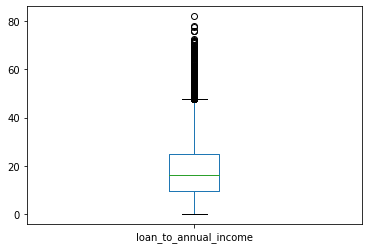

In [289]:
loan_df['loan_to_annual_income'] = loan_df['loan_amnt']*100/loan_df['annual_inc']
loan_df['loan_to_annual_income'].plot.box()
loan_df['loan_to_annual_income'].describe()

#### <font color='blue'> Since loan_to_annual_income max is 83% we are making below assumptions for binning the ratio </font>
#### <font color = 'blue'>Loan to annual income ratio binning :</font> Very Low(<10%),Low(10%-40%),Medium (40%-60%),High(60%-100%),Very High(>100%)

In [290]:
def ratioBinning(ratio):
    if ratio < 10.00 :
        return 'Very Low'
    elif ratio < 40.00 :
        return 'Low'
    elif ratio < 60.00 :
        return 'Medium'
    elif ratio < 100.00 :
        return 'High'
    else :
        return 'Very High'
    
loan_df['loan_to_annual_inc_range'] = loan_df['loan_to_annual_income'].apply(ratioBinning)
loan_df['loan_to_annual_inc_range'].value_counts()

Low         25401
Very Low     9360
Medium       1999
High           87
Name: loan_to_annual_inc_range, dtype: int64

#### 2.1.4 Annual income binning

In [291]:
loan_df['annual_inc'].describe().apply(lambda x: format(x, 'f'))

count      36847.000000
mean       69404.481862
std        64027.473436
min         4000.000000
25%        41004.000000
50%        60000.000000
75%        83000.000000
max      6000000.000000
Name: annual_inc, dtype: object

#### 3 <font color = 'blue'>Since 75 percentile is at 83k. We are making below assumptions for binning annual income </font>
#### <font color = 'blue'>Annual income binning :</font> Very Low (<20k), Low (20k-40k),Medium(40k-80k),High(80k-120k),VeryHigh(>120k)

In [292]:
annual_inc_range_order = ['Very Low','Low','Medium','High','Very High']
def binning(income):
    if income < 20000.00 :
        return 'Very Low'
    elif income < 40000.00 :
        return 'Low'
    elif income < 80000.00 :
        return 'Medium'
    elif income < 120000.00 :
        return 'High'
    else :
        return 'Very High'
loan_df['annual_inc_range'] = loan_df['annual_inc'].apply(binning)
loan_df['annual_inc_range'].value_counts()

Medium       18407
Low           7231
High          6813
Very High     3537
Very Low       859
Name: annual_inc_range, dtype: int64

# 3. Univariate Analysis

In [293]:
# Column metadata used by functions below
column_titles = {
    'loan_amnt': 'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'funded_amnt_inv': 'Funded Amount Investors',
    'term': 'Loan Term',
    'int_rate': 'Interest Rate',
    'installment': 'Installment',
    'grade': 'Grade',
    'emp_length': 'Employment Length',
    'home_ownership': 'Home Owner Status',
    'annual_inc': 'Annuap Income',
    'verification_status': 'Verification Status',
    'issue_d': 'Issue Date',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt To Income Ratio',
    'pub_rec_bankruptcies': 'Bankruptcies Record',
    'issue_y': 'Issue Year',
    'issue_m': 'Issue Month',
    'issue_q': 'Issue Quarter',
    'loan_amnt_b': 'Loan Amount Bins',
    'funded_amnt_inv_b': 'Investor Funded Bins',
    'funded_amnt_b': 'Funded Amount Bins',
    'annual_inc_b': 'Annual Income Bins',
    'int_rate_b': 'Interest Rate Bins',
    'dti_b': 'DTI Bins'
}

In [294]:
# Different varaibles Bucketing for better analysis

In [295]:
# Bucketting Loan Amount
def bucket_loan_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'
    else:
        return '15K - above' # 75% quartile

loan_df['loan_amnt_b'] = loan_df.apply(lambda x : bucket_loan_amnt(x['loan_amnt']), axis = 1)

In [296]:
#Bucketing Annual Income
def bucket_annual_inc(column):
    if column <= 40000:
        return '0 - 40k' # 25% quartile
    elif (column >40000) and (column <= 50000):
        return '40k - 50k'
    elif (column >50000) and (column <= 60000):
        return '50k to 60k'
    elif (column >60000) and (column <= 70000):
        return '60k to 70k'
    elif (column >70000) and (column <= 80000):
        return '70k to 80k'
    else:
        return '80k - above' # 75% quartile

loan_df['annual_inc_b'] = loan_df.apply(lambda x: bucket_annual_inc(x['annual_inc']), axis = 1)

In [297]:
# Bucketing interest rate
def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low' # 25% quartile
    elif (column >9) and (column <= 11):
        return 'Low'
    elif (column >11) and (column <= 13):
        return 'Moderate'
    elif (column >13) and (column <= 15):
        return 'High'
    else:
        return 'Very High' # 75% quartile

loan_df['int_rate_b'] = loan_df.apply(lambda x : bucket_int_rate(x.int_rate), axis = 1)

In [298]:
# Bucketing dti
def bucket_dti(column):
    if column <= 8:
        return 'Very Low' # 25% quartile
    elif (column >8) and (column <= 12):
        return 'Low'
    elif (column >12) and (column <= 16):
        return 'Moderate'
    elif (column >16) and (column <= 20):
        return 'High'
    else:
        return 'Very High' # 75% quartile

loan_df['dti_b'] = loan_df.apply(lambda x : bucket_dti(x.dti), axis = 1)

In [299]:
# Univarients function
def plot_digram(df, column):
    fig, p = plot.subplots(1,2, figsize=(16, 4))
    sea.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
    sea.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(column_titles[column])
    p[1].set_xlabel(column_titles[column])
    plot.tight_layout()
    plot.show()

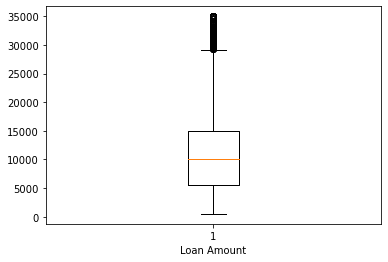

In [300]:
plot.boxplot(loan_df['loan_amnt'])
plot.xlabel('Loan Amount')  # Adding x-axis label
plot.show()

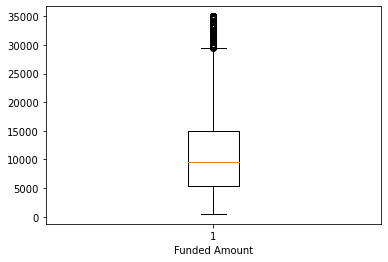

In [301]:
plot.boxplot(loan_df['funded_amnt'])
plot.xlabel('Funded Amount')  # Adding x-axis label
plot.show()

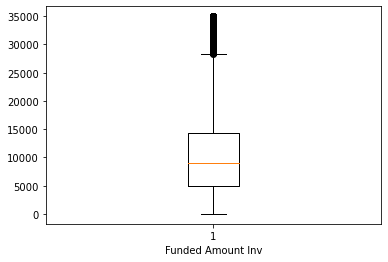

In [302]:
plot.boxplot(loan_df['funded_amnt_inv'])
plot.xlabel('Funded Amount Inv')  # Adding x-axis label
plot.show()

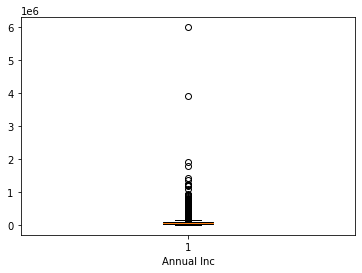

In [303]:
plot.boxplot(loan_df['annual_inc'])
plot.xlabel('Annual Inc')  # Adding x-axis label
plot.show()

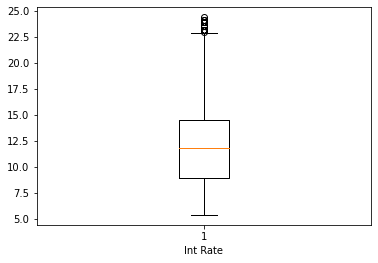

In [304]:
plot.boxplot(loan_df['int_rate'])
plot.xlabel('Int Rate')  # Adding x-axis label
plot.show()

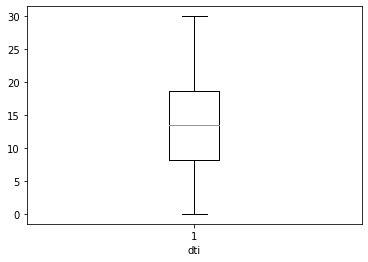

In [305]:
plot.boxplot(loan_df['dti'])
plot.xlabel('dti')  # Adding x-axis label
plot.show()

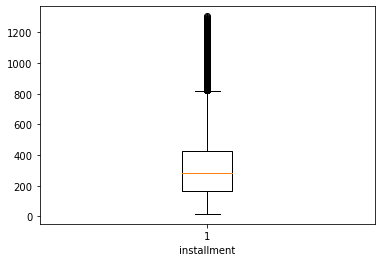

In [306]:
plot.boxplot(loan_df['installment'])
plot.xlabel('installment')  # Adding x-axis label
plot.show()

In [307]:
# From above box plts we can see there is otliers exits for columns'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc'.
outliers_columns_set1= ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']
outliers_columns_set2=['int_rate', 'installment', 'annual_inc']
# Define a function to remove outliers based on IQR
def remove_outliers_iqr(data, columns,threshold):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Remove outliers from the DataFrame
loan_df =remove_outliers_iqr(loan_df, outliers_columns_set1,1.5)
loan_df =remove_outliers_iqr(loan_df, outliers_columns_set2,1.5)

# 3.1 Quantitative Variable Analysis ####################

## Loan amount

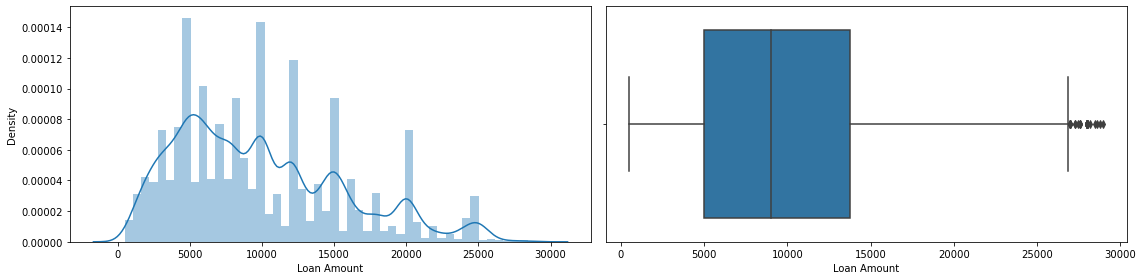

count    33191.000000
mean      9820.838480
std       5809.600807
min        500.000000
25%       5000.000000
50%       9000.000000
75%      13750.000000
max      29000.000000
Name: loan_amnt, dtype: float64

In [308]:
plot_digram(loan_df, 'loan_amnt')
#print(loan_df["loan_amnt"].mean())
# describe the Loan Amount
loan_df['loan_amnt'].describe()

### observation:
#### Most of the loan amount applied was in the range of 5k-14k.
#### Max Loan amount applied was ~27k.

## Annual income

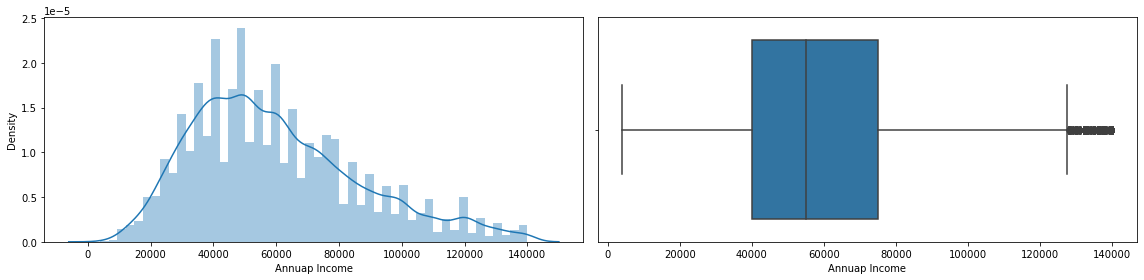

count     33191.000000
mean      59883.284700
std       26916.857415
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      140000.000000
Name: annual_inc, dtype: float64

In [309]:
plot_digram(loan_df, 'annual_inc')
#print(loan_df["loan_amnt"].mean())
# describe the annual income details
loan_df['annual_inc'].describe()

### observation:
#### The Annual income of most of applicants lies between 40k-75k.

## Funded amount

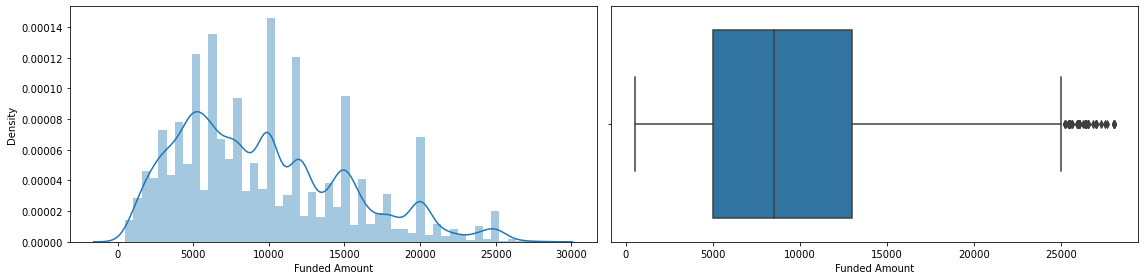

count    33191.000000
mean      9593.825887
std       5565.574327
min        500.000000
25%       5000.000000
50%       8500.000000
75%      13000.000000
max      28000.000000
Name: funded_amnt, dtype: float64

In [310]:
plot_digram(loan_df, 'funded_amnt')
loan_df['funded_amnt'].describe()

### observation:
#### Majority of the funded_amnt is in the range of 5K to 13K

## Interest Rate

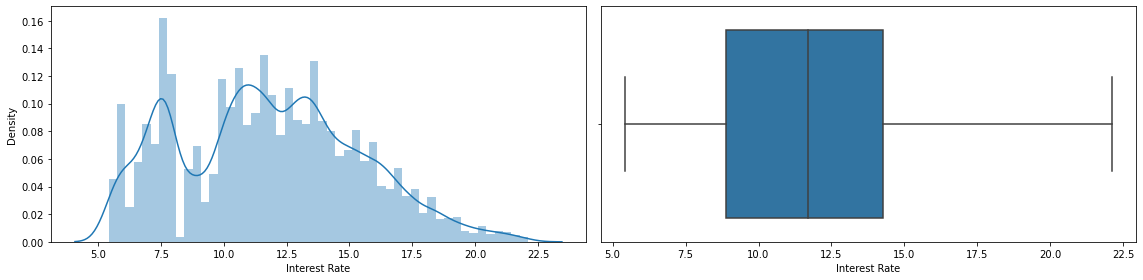

count    33191.000000
mean        11.782783
std          3.591944
min          5.420000
25%          8.900000
50%         11.710000
75%         14.260000
max         22.110000
Name: int_rate, dtype: float64

In [311]:
plot_digram(loan_df, 'int_rate')
loan_df['int_rate'].describe()

### observation:
#### Most of the applicant's rate of interesrt is between in the range of 8%-14%.
#### Average Rate of interest of rate is 11.7 %

## Installment

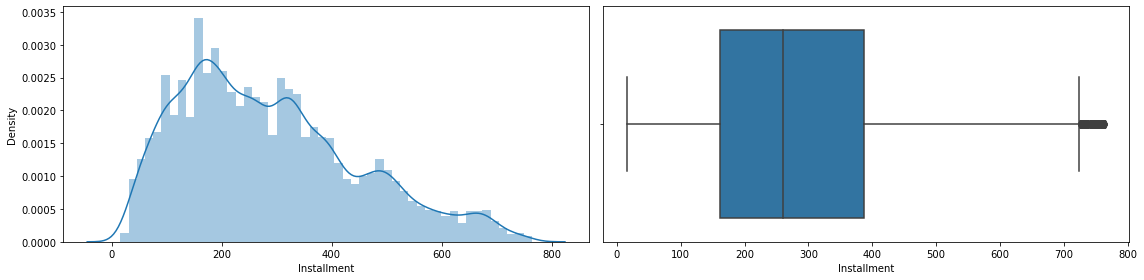

count    33191.000000
mean       286.456292
std        161.010324
min         16.080000
25%        161.130000
50%        260.480000
75%        386.390000
max        763.830000
Name: installment, dtype: float64

In [312]:
plot_digram(loan_df, 'installment')
loan_df['installment'].describe()

### Observation 
#### Majority of the installment is in the range of 20 to 400 going at the max to 763

## Dti

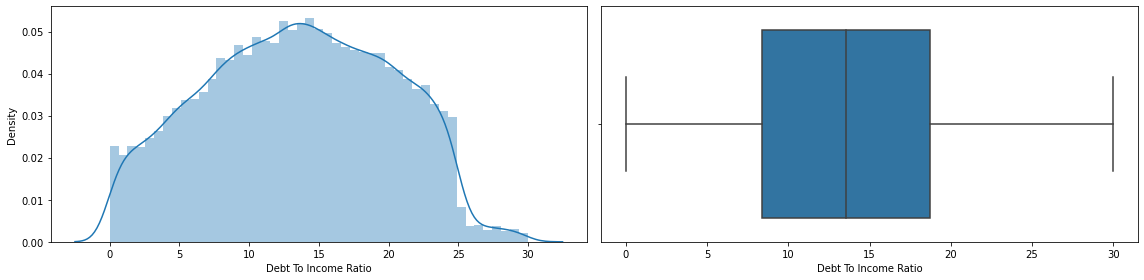

count    33191.000000
mean        13.463454
std          6.651684
min          0.000000
25%          8.360000
50%         13.570000
75%         18.730000
max         29.990000
Name: dti, dtype: float64

In [313]:
plot_digram(loan_df, 'dti')
loan_df['dti'].describe()

### Observation
#### Majority of the debt to income is in the range of 0 to 20 going at the max to 30**

# 3.2 Unordered Categorical Variable Analysis

### Home ownership

<AxesSubplot:>

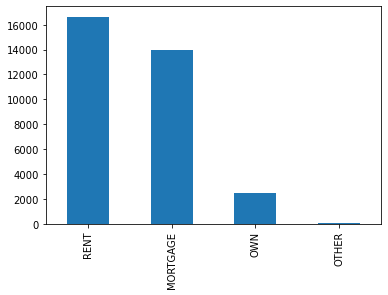

In [314]:
loan_df['home_ownership'].value_counts().plot.bar()

### Observation:
#### Majority of the home owner status are in status of RENT and MORTGAGE

### Purpose

<AxesSubplot:>

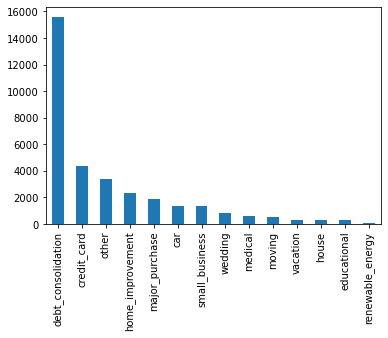

In [315]:
loan_df['purpose'].value_counts().plot.bar()

### Observation:
#### Majority of loan application are in the category of debt_consolidation

### Address state

<AxesSubplot:>

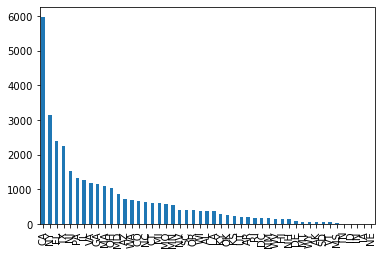

In [316]:
loan_df['addr_state'].value_counts().plot.bar()

### Observation:
#### CA state has the maximum amount of loan applications

# 3.3 Ordered Categorical Variable Analysis

<AxesSubplot:ylabel='emp_length'>

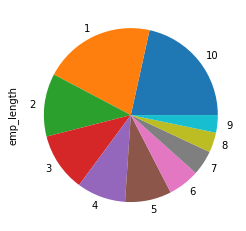

In [317]:
loan_df['emp_length'].value_counts().plot(kind="pie")

In [318]:
### Majority of the employment length of the customers are 10+ years and then in the range of 0-2 years**

<AxesSubplot:>

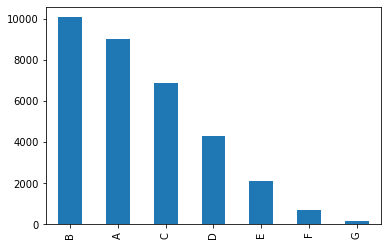

In [319]:
loan_df['grade'].value_counts().plot.bar()

In [320]:
### Majority of loan application counts fall under the catogory of **Grade B**

<AxesSubplot:>

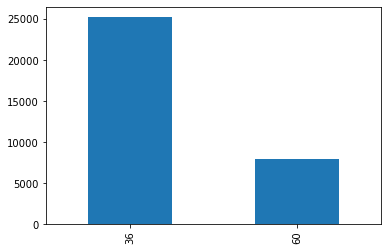

In [321]:
loan_df['term'].value_counts().plot.bar()

In [322]:
#### Majority of the loan applications counts are in the term of 36 months.

<AxesSubplot:>

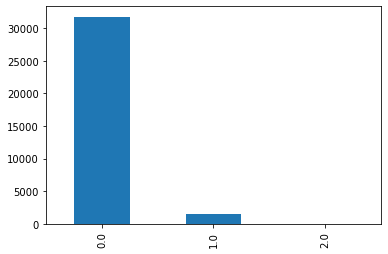

In [323]:
loan_df['pub_rec_bankruptcies'].value_counts().plot.bar()

In [324]:
#### Majority of the loan applicants are in the category of not having an public record of bankruptcies

# 3.4 Segmented Analysis of Default/Non default

In [325]:
catergorical_predictors = {'term','verification_status','home_ownership','grade','annual_inc_range','loan_to_annual_inc_range'}
catergorical_predictors2 = {'purpose','emp_length'}

#### <font color='black'>over Employee experience</font>

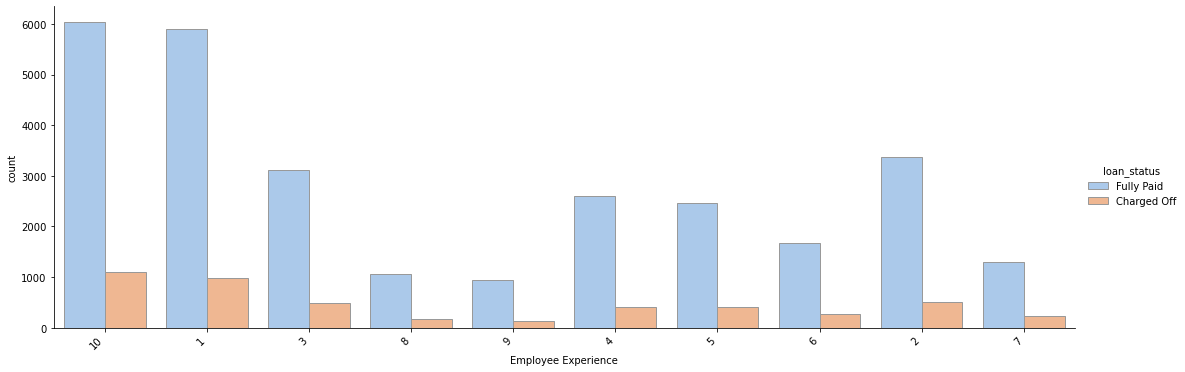

In [326]:
a = sea.catplot(x='emp_length', hue='loan_status', kind="count",
            palette="pastel", edgecolor=".6",aspect = 3,
            data=loan_df)
plot.xlabel('Employee Experience')
for axes in a.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45,horizontalalignment='right')

#### <font color='black'>over Purpose</font>

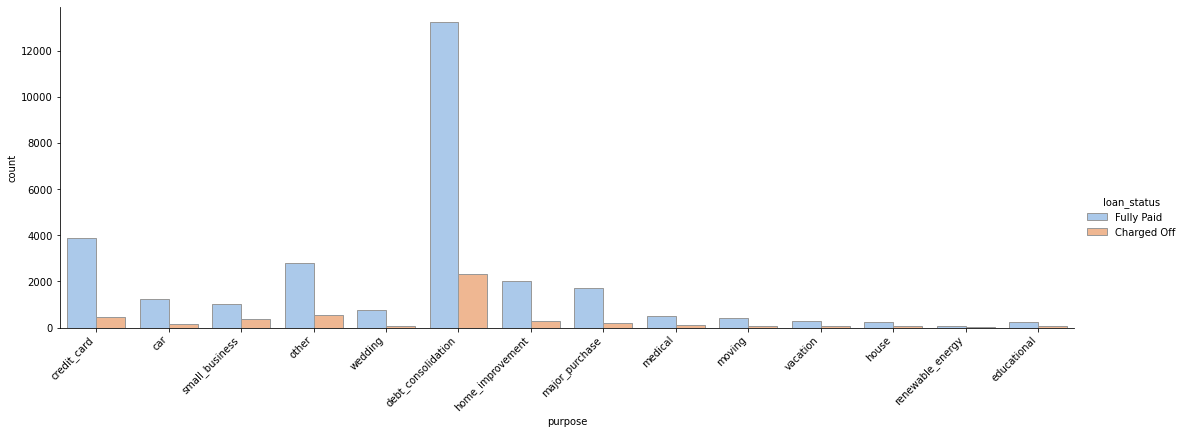

In [327]:
a = sea.catplot(x='purpose', hue='loan_status', kind="count",
            palette="pastel", edgecolor=".6",aspect = 3,
            data=loan_df)
for axes in a.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45,horizontalalignment='right')

#### <font color='black'>over term,verification_status,home_ownership,grade,annual_inc_range,loan_to_annual_inc_range</font>

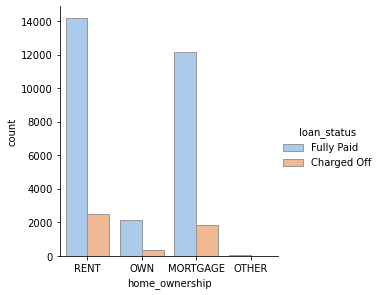

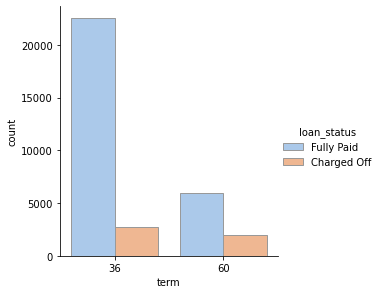

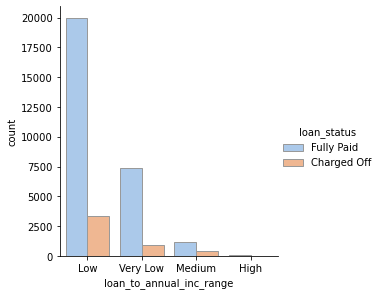

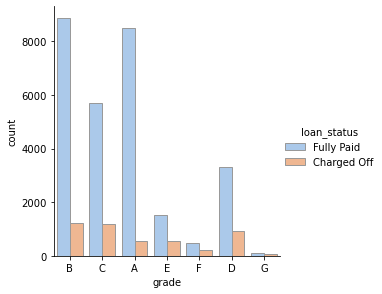

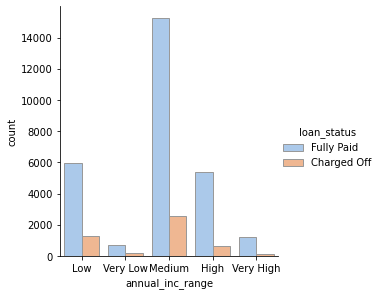

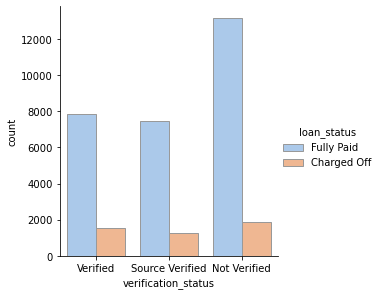

In [328]:
def plotCountsOnY(predictors):
        
        for i,col in enumerate(predictors):
            sea.catplot(x=col, hue='loan_status', kind="count",
            palette="pastel", edgecolor=".6",height = 4,
            data=loan_df) 

plotCountsOnY(catergorical_predictors)


### Total Defaulters - <font color = 'black'>4714</font>

In [329]:
print(loan_df['default'].sum())

4714


#### Defaulter patterns

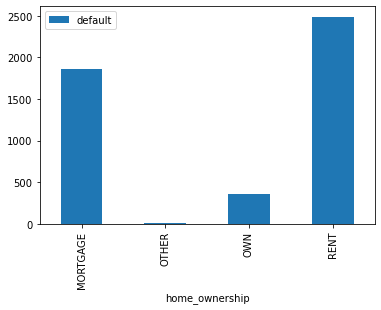

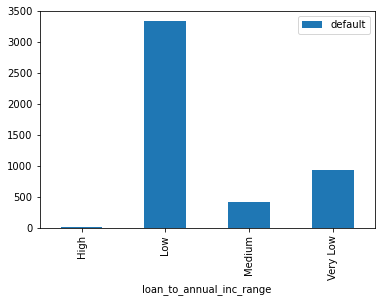

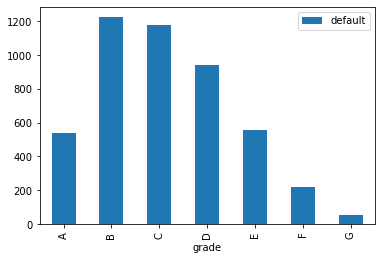

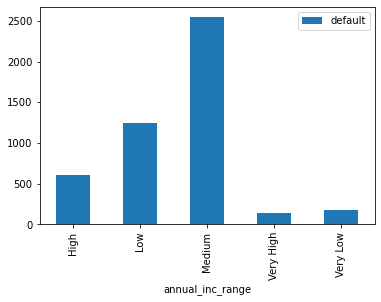

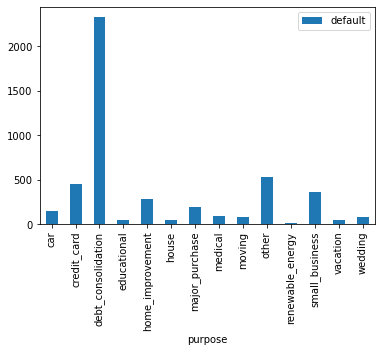

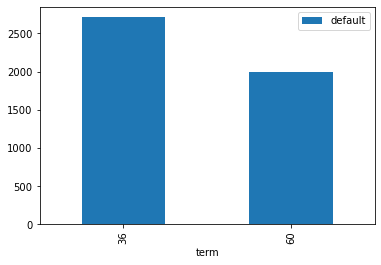

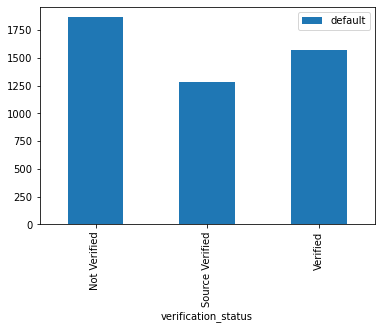

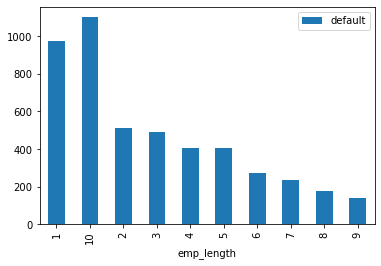

In [330]:
def dafaulterPattern(predictors):
        
        for i,col in enumerate(predictors):
            term_pivot= pd.pivot_table(loan_df,index=[col],values=['default'],aggfunc='sum')
            term_pivot.plot.bar()            

dafaulterPattern(catergorical_predictors.union(catergorical_predictors2))

### Top defaultors in each predictor

In [331]:
def dafaulterPattern(predictors):
        for i,col in enumerate(predictors):
            term_pivot= pd.pivot_table(loan_df,index=[col],values=['default'],aggfunc='sum')
            data = term_pivot['default'].sort_values(ascending =False).head(2)
            print(data.head(2))
            print('\n')
dafaulterPattern(catergorical_predictors.union(catergorical_predictors2))

home_ownership
RENT        2488
MORTGAGE    1855
Name: default, dtype: int64


loan_to_annual_inc_range
Low         3339
Very Low     943
Name: default, dtype: int64


grade
B    1225
C    1177
Name: default, dtype: int64


annual_inc_range
Medium    2543
Low       1247
Name: default, dtype: int64


purpose
debt_consolidation    2329
other                  531
Name: default, dtype: int64


term
36    2715
60    1999
Name: default, dtype: int64


verification_status
Not Verified    1864
Verified        1566
Name: default, dtype: int64


emp_length
10    1103
1      976
Name: default, dtype: int64




# 4. Bivariate Analysis ######################

In [332]:
#Bivariate Analysis on annual income against Chargedoff_Proportion -

inc_range_vs_loan = loan_df.groupby(['annual_inc_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off']+ inc_range_vs_loan['Fully Paid']
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0 - 40k,1570,7326,8896,0.176484
2,50k to 60k,788,4435,5223,0.150871
1,40k - 50k,807,4593,5400,0.149444
3,60k to 70k,486,3261,3747,0.129704
4,70k to 80k,385,2749,3134,0.122846
5,80k - above,678,6113,6791,0.099838


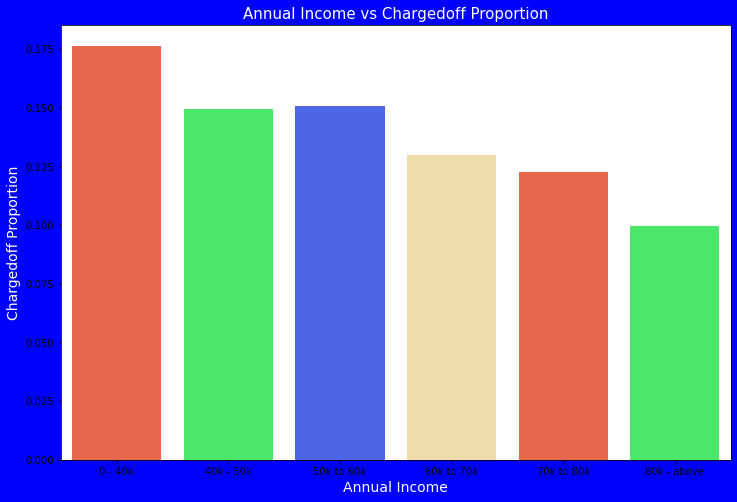

In [333]:
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'w')
colors = ['#FF5733', '#33FF57', '#3357FF', '#F9E2A0']  # Example list of colors
ax1=sea.barplot(x='annual_inc_b', y='Chargedoff_Proportion', data=inc_range_vs_loan, palette=colors)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plot.show()
# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-40000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased.

In [334]:
#Bivariate Analysis on Intrest rate  against Chargedoff_Proportion -

interest_vs_loan = loan_df.groupby(['int_rate_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off']+ interest_vs_loan['Fully Paid']
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,int_rate_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,Very High,1670,4751,6421,0.260084
0,High,985,4851,5836,0.168780
2,Moderate,961,5638,6599,0.145628
1,Low,579,4983,5562,0.104099
4,Very Low,519,8254,8773,0.059159


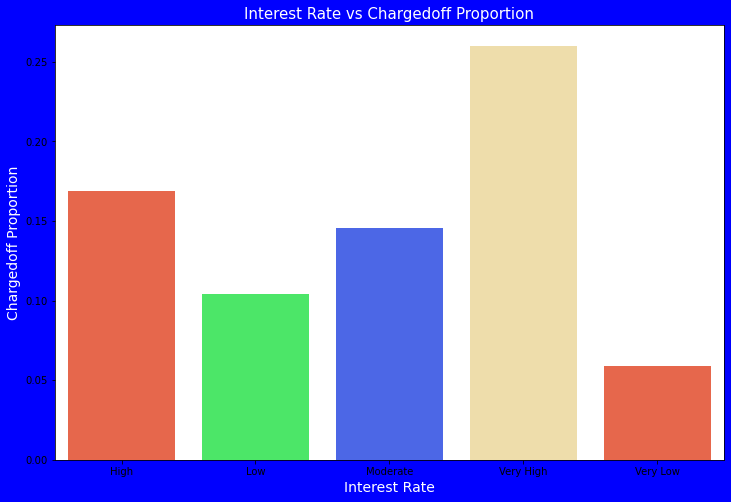

In [335]:
## plot the diagram.
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15,color='w')
colors = ['#FF5733', '#33FF57', '#3357FF', '#F9E2A0']  # Example list of colors
ax1=sea.barplot(x='int_rate_b', y='Chargedoff_Proportion', data=interest_vs_loan, palette=colors)
ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.show()

# Observations:
# interest rate less than 10% or very low has very less chances of charged off. Intrest rates are starting from minimin 5 %.
# interest rate more than 16% or very high has good chnaces of charged off as compared to other category intrest rates.
# Charged off proportion is increasing with higher intrest rates.

In [336]:
#Bivariate Analysis of Home Ownership against Chargedoff_Proportion -

home_ownership_vs_loan = loan_df.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
home_ownership_vs_loan['Total'] = home_ownership_vs_loan['Charged Off']+ home_ownership_vs_loan['Fully Paid']
home_ownership_vs_loan['Chargedoff_Proportion'] = home_ownership_vs_loan['Charged Off'] / home_ownership_vs_loan['Total']
home_ownership_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,home_ownership,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,OTHER,16,73,89,0.179775
3,RENT,2488,14156,16644,0.149483
2,OWN,355,2121,2476,0.143376
0,MORTGAGE,1855,12127,13982,0.132671


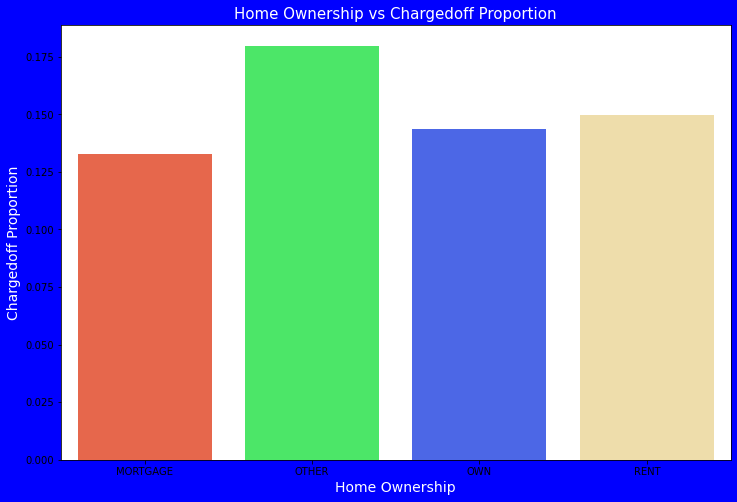

In [337]:
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Home Ownership vs Chargedoff Proportion',fontsize=15,color='w')
colors = ['#FF5733', '#33FF57', '#3357FF', '#F9E2A0']  # Example list of colors
ax1=sea.barplot(x='home_ownership', y='Chargedoff_Proportion', data=home_ownership_vs_loan, palette=colors)
ax1.set_xlabel('Home Ownership',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.show()

# observation:
# Those who are not owning the home is having high chances of loan defaults.

In [338]:
#Bivariate Analysis on Purpose of loan against Chargedoff_Proportion -

purpose_vs_loan = loan_df.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off']+ purpose_vs_loan['Fully Paid']
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,366,1003,1369,0.267348
10,renewable_energy,16,67,83,0.192771
5,house,49,249,298,0.164430
3,educational,46,235,281,0.163701
9,other,531,2823,3354,0.158318
7,medical,95,510,605,0.157025
8,moving,79,433,512,0.154297
2,debt_consolidation,2329,13253,15582,0.149467
12,vacation,49,281,330,0.148485
4,home_improvement,277,2026,2303,0.120278


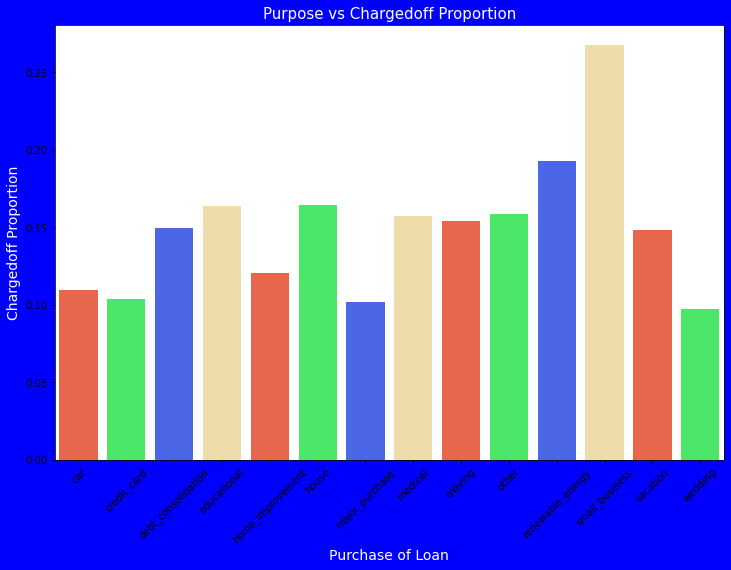

In [339]:
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
colors = ['#FF5733', '#33FF57', '#3357FF', '#F9E2A0']  # Example list of colors
ax1.set_title('Purpose vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='purpose', y='Chargedoff_Proportion', data=purpose_vs_loan, palette=colors)
ax1.set_xlabel('Purchase of Loan',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.xticks(rotation=45)
plot.show()

# Observations:
#1. Those applicants who is having home loan or car loan is having low chances of loan defaults.
#2. Those applicants having loan for small bussiness is having high chances for loan defaults.

In [340]:
#Bivariate Analysis on DTI against Chargedoff_Proportion -

dti_vs_loan = loan_df.groupby(['dti_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_vs_loan['Total'] = dti_vs_loan['Charged Off']+ dti_vs_loan['Fully Paid']
dti_vs_loan['Chargedoff_Proportion'] = dti_vs_loan['Charged Off'] / dti_vs_loan['Total']
dti_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,dti_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,Very High,1044,5387,6431,0.162339
0,High,948,5111,6059,0.156461
2,Moderate,985,5785,6770,0.145495
1,Low,789,5339,6128,0.128753
4,Very Low,948,6855,7803,0.121492


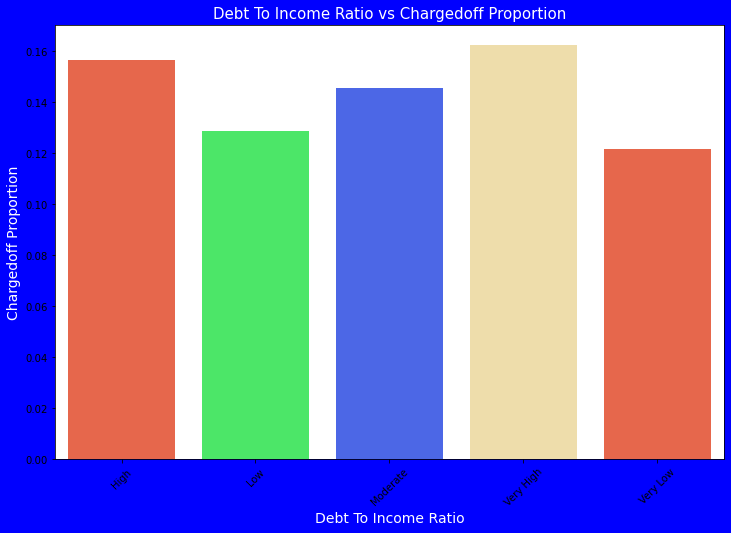

In [341]:
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
colors = ['#FF5733', '#33FF57', '#3357FF', '#F9E2A0']  # Example list of colors
ax1.set_title('Debt To Income Ratio vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='dti_b', y='Chargedoff_Proportion', data=dti_vs_loan, palette=colors)
ax1.set_xlabel('Debt To Income Ratio',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.xticks(rotation=45)
plot.show()

# Observations:
#1.High DTI value  having high risk of defaults
#2. Lower the DTO having low chances loan defaults.

In [342]:
# #Bivariate Analysis on Bankruptcies Record against Chargedoff_Proportion -
pub_rec_bankruptcies_vs_loan = loan_df.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pub_rec_bankruptcies_vs_loan['Total'] = pub_rec_bankruptcies_vs_loan['Charged Off']+ pub_rec_bankruptcies_vs_loan['Fully Paid']
pub_rec_bankruptcies_vs_loan['Chargedoff_Proportion'] = pub_rec_bankruptcies_vs_loan['Charged Off'] / pub_rec_bankruptcies_vs_loan['Total']
pub_rec_bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,2.0,2,3,5,0.400000
1,1.0,308,1137,1445,0.213149
0,0.0,4404,27337,31741,0.138748


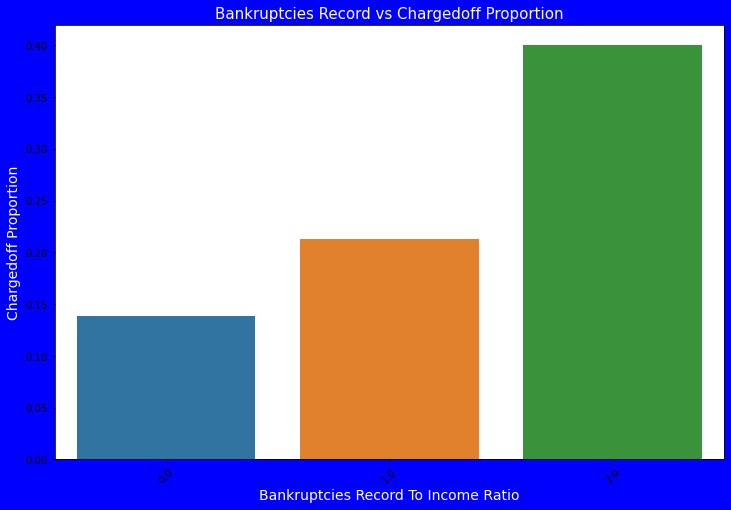

In [343]:
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Bankruptcies Record vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=pub_rec_bankruptcies_vs_loan)
ax1.set_xlabel('Bankruptcies Record To Income Ratio',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.xticks(rotation=45)
plot.show()

# Observations:
#1.Bankruptcies Record with 2 is having high impact on loan defaults
#2.Bankruptcies Record with 0 is low impact on loan defaults
#3.Lower the Bankruptcies lower the risk.

In [344]:
##Bivariate Analysis on Issues of Year  against Chargedoff_Proportion -

issue_year_vs_loan = loan_df.groupby(['issue_year', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_year_vs_loan['Total'] = issue_year_vs_loan['Charged Off']+ issue_year_vs_loan['Fully Paid']
issue_year_vs_loan['Chargedoff_Proportion'] = issue_year_vs_loan['Charged Off'] / issue_year_vs_loan['Total']
issue_year_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,issue_year,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,2007,2,5,7,0.285714
4,2011,2705,14788,17493,0.154633
1,2008,158,880,1038,0.152216
3,2010,1312,9012,10324,0.127083
2,2009,537,3792,4329,0.124047


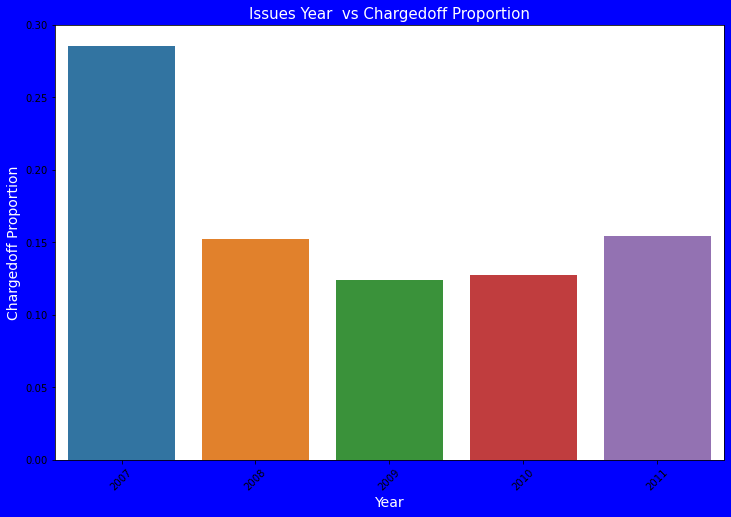

In [345]:
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Issues Year  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='issue_year', y='Chargedoff_Proportion', data=issue_year_vs_loan)
ax1.set_xlabel('Year',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.xticks(rotation=45)
plot.show()

##Observation:
# Year 2007 is highest loan defaults.
# 2009 is having lowest loan defaults.

In [346]:
##Bivariate Analysis on Address state  against Chargedoff_Proportion -

addr_state_vs_loan = loan_df.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
addr_state_vs_loan['Total'] = addr_state_vs_loan['Charged Off']+ addr_state_vs_loan['Fully Paid']
addr_state_vs_loan['Chargedoff_Proportion'] = addr_state_vs_loan['Charged Off'] / addr_state_vs_loan['Total']
addr_state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,addr_state,Charged Off,Fully Paid,Total,Chargedoff_Proportion
40,TN,2.0,7.0,9.0,0.222222
31,NV,87.0,328.0,415.0,0.209639
11,HI,28.0,119.0,147.0,0.190476
0,AK,12.0,51.0,63.0,0.190476
39,SD,11.0,48.0,59.0,0.186441
30,NM,28.0,133.0,161.0,0.173913
9,FL,414.0,1990.0,2404.0,0.172213
23,MO,99.0,492.0,591.0,0.167513
35,OR,63.0,328.0,391.0,0.161125
10,GA,184.0,981.0,1165.0,0.157940


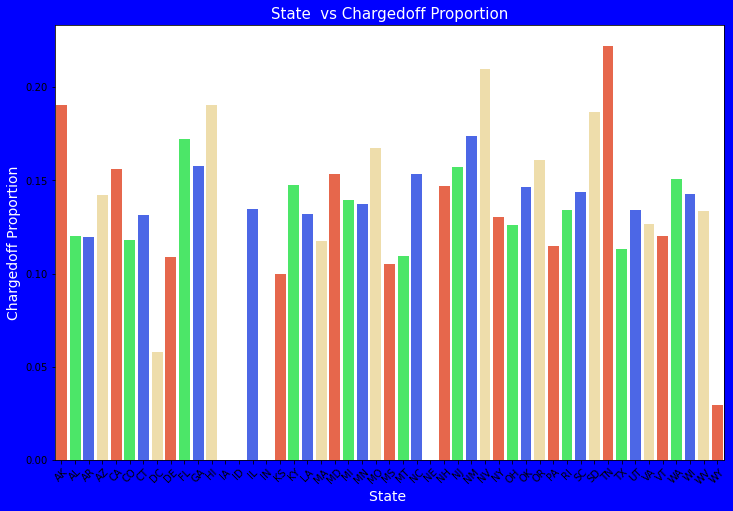

In [347]:
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
colors = ['#FF5733', '#33FF57', '#3357FF', '#F9E2A0']  # Example list of colors
ax1.set_title('State  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='addr_state', y='Chargedoff_Proportion', data=addr_state_vs_loan, palette=colors)
ax1.set_xlabel('State ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.xticks(rotation=45)
plot.show()

# Observations:
# 1.TN States is holding highest number of loan defaults.
# 2.WY is having low number of loan defaults

In [348]:
##Bivariate Analysis on Grade against Chargedoff_Proportion -

grade_vs_loan = loan_df.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off']+ grade_vs_loan['Fully Paid']
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion
6,G,55,104,159,0.345912
5,F,220,480,700,0.314286
4,E,557,1518,2075,0.268434
3,D,941,3329,4270,0.220375
2,C,1177,5702,6879,0.171100
1,B,1225,8857,10082,0.121504
0,A,539,8487,9026,0.059716


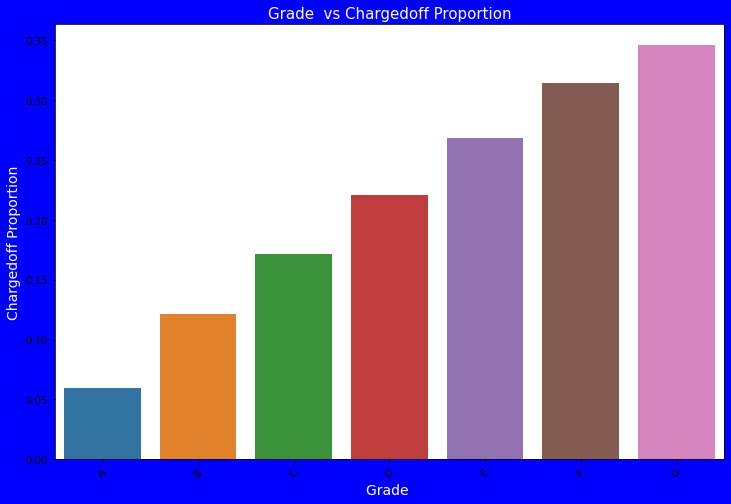

In [349]:
fig, ax1 = plot.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Grade  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sea.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Grade ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plot.xticks(rotation=45)
plot.show()

# observations :
#1. The Loan applicants with loan Grade G is having higest Loan Defaults.
#2. The Loan applicants with loan A is having lowest Loan Defaults.

In [350]:
loan_df.shape

(33191, 30)

## Correlation 

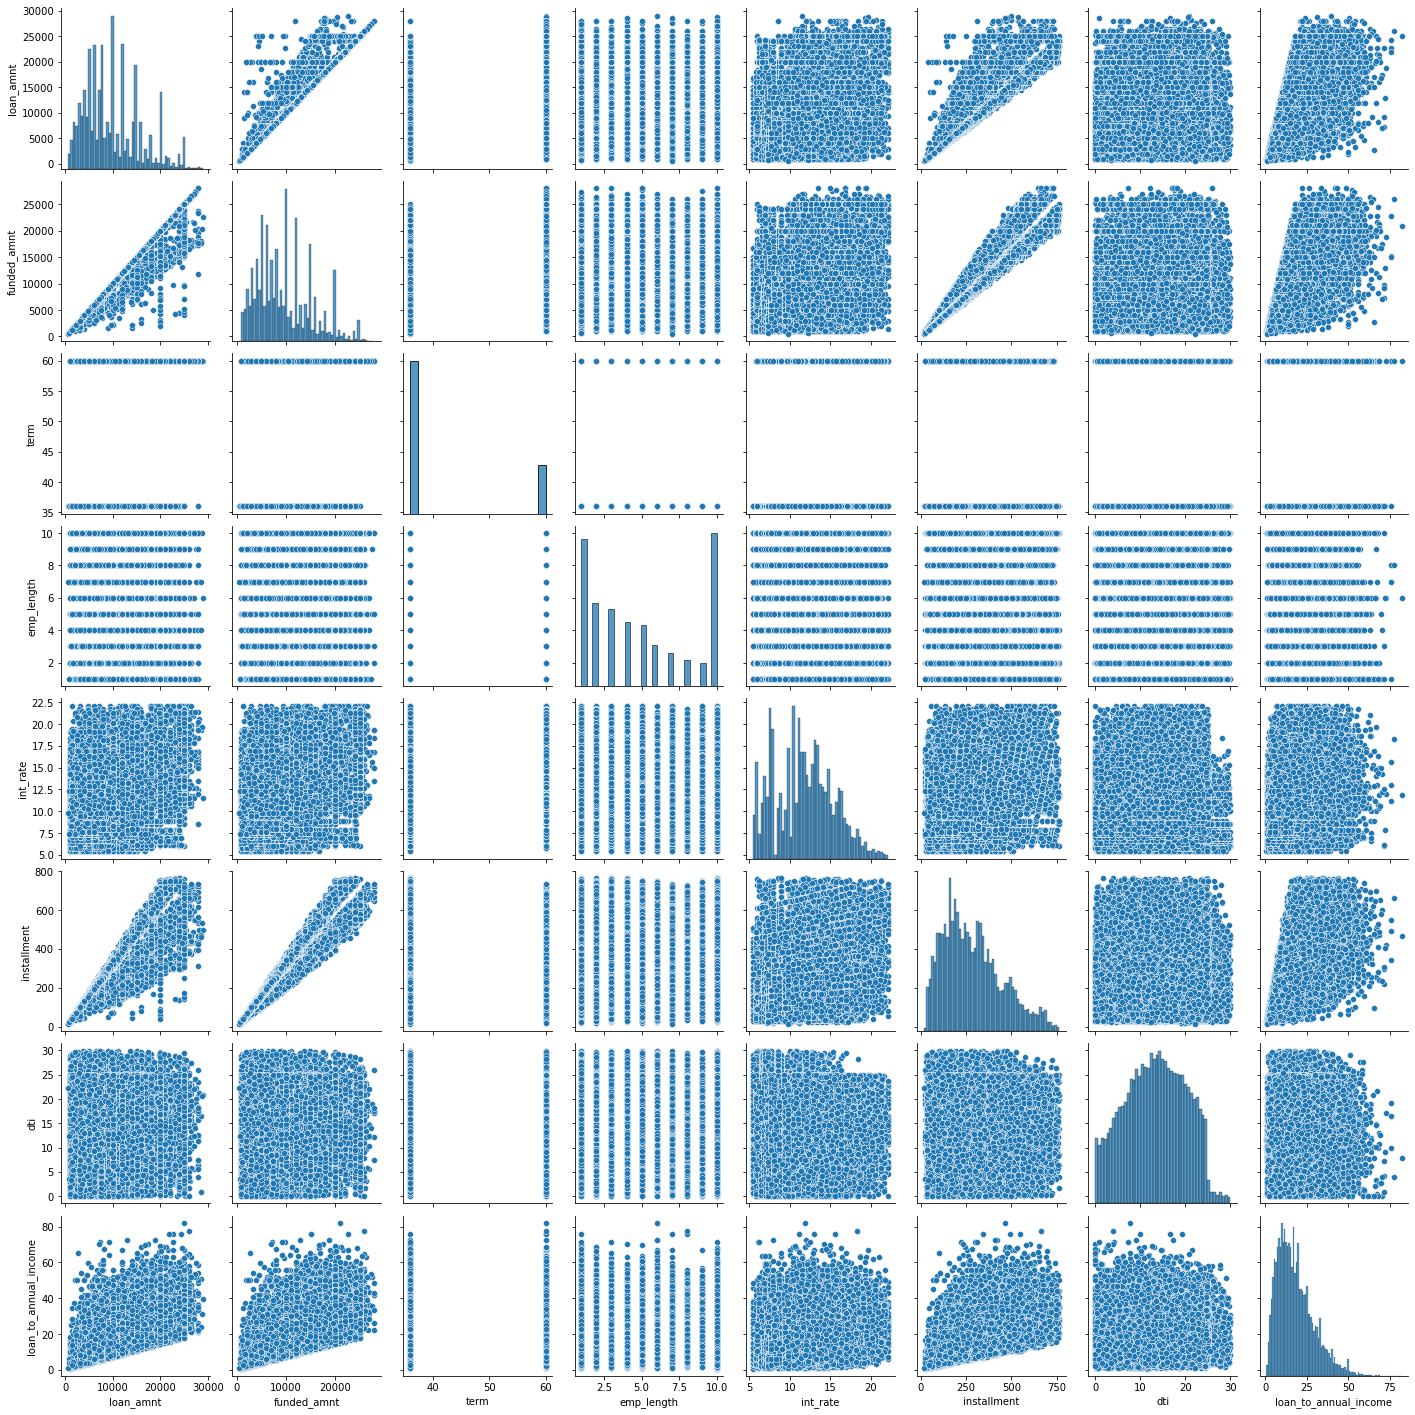

In [351]:
loan_df['emp_length'] = loan_df['emp_length'].astype(int)
quantitative_df = loan_df[['loan_amnt','funded_amnt','term','emp_length','int_rate','installment','dti','loan_to_annual_income']]
sea.pairplot(quantitative_df, palette='pastel')
plot.show()

### Observation 
#### Funded amount increased with Loan amount in almost linear fashion.
#### No other quantitave variables given are directly correlated
#### Employees of different experience years have no strong relation with the loan amount, interest rate and term

# Conclusion

### Most of the loan amount applied was in the range of 5k-14kMost of the applicant's rate of interest is between in the range of 8%-14%
### CA state has the maximum amount of loan applications
### Income range 0-40000 has high chances of charged off
### interest rate more than 16% or very high has good chances of charged off as compared to other category intrest rates. Charged off proportion is increasing with higher intrest rates.
### Those who are not owning the home is having high chances of loan defaults.
### Those applicants who is having home loan or car loan is having low chances of loan defaults. Those applicants having loan for small business is having high chances for loan defaults.
### High DTI value is having high risk of defaults
### Higher the Bankruptcies record higher the chance of loan defaults
### TN States is holding highest number of loan defaults
### The Loan applicants with loan Grade G is having highest Loan Defaults. The Loan applicants with loan A is having lowest Loan Defaults
### Year 2007 is highest loan defaults. 2009 is having lowest loan defaults

### Purpose : <font color = 'blue'>Debt Consolidation</font> has high chances of loan defaults
### Employee experience  : <font color = 'blue'>>10 years</font>  has high chances of loan default
### Annual income range : <font color = 'blue'>Medium(40K-80K)</font>  has high chances of loan default
### Home ownership and Verification status : <font color = 'blue'>Rent (Verified and Not Verified) and Mortgage (Verified)  has high chances of loan default</font>